# Narratif du Système de Couverture par Apprentissage par Renforcement

## Contexte et Environnement

Dans ce projet, l'environnement financier est simulé à l'aide de la fonction **`monte_carlo_paths`**.  
Cette fonction génère des trajectoires de prix d'un actif sous-jacent sur une période donnée, simulant l'évolution du marché.  
Chaque trajectoire représente une séquence d'états du marché, et l'ensemble de ces trajectoires constitue l'environnement dans lequel évolue l'agent.

## Représentation de l'État

À chaque instant, l'état du marché est représenté par un vecteur de **7 caractéristiques** essentielles, qui sont construites et agrégées dans l'entrée du modèle. Ces caractéristiques incluent :

- **Sₜ** : Le prix actuel du sous-jacent.
- **T_remaining** : Le temps restant jusqu'à l'échéance.
- **delta_prev** : La position de couverture (delta) prise à l'instant précédent.
- **cash_prev** : La trésorerie disponible à l'instant précédent.
- **call_price_t_minus** : Le prix du call calculé via Black-Scholes à l'instant précédent.
- **call_price_t** : Le prix du call à l'instant courant.
- **simulation_summary** : Un résumé de la simulation (par exemple, Sₜ * exp(r * T_remaining)).

Ces informations forment le vecteur d'état qui est transmis au modèle LSTM.

## L'Agent et ses Actions

L'agent, implémenté dans la classe **`Agent`** (un modèle LSTM enregistré comme sérialisable par TensorFlow), agit dans cet espace d'états.  
À chaque instant, il :

1. **Observe l'état** du marché représenté par le vecteur de 7 caractéristiques.
2. **Décide d'une action** en choisissant une nouvelle valeur de delta (la position de couverture) afin d'ajuster son portefeuille.

Ces décisions sont prises de manière séquentielle et sont représentées par une suite de deltas (δ₁, δ₂, …, δ_T).

## Fonction de Récompense et Objectif

La fonction de récompense, qui guide l'apprentissage de l'agent, est conçue pour :
- **Minimiser le risque** en réduisant le **CVaR** (Conditional Value at Risk) – une mesure qui capture la moyenne des pires pertes.
- **Minimiser la variance** pour stabiliser les résultats.
- **Maximiser la skewness** afin d'encourager des gains potentiels élevés dans les scénarios favorables.

L'objectif global (fonction de perte) est donc défini comme :



* `loss = cvar - lambda_skew * skew + lambda_var * var`


où :

* `cvar` : Le CVaR (Conditional Value at Risk) calculé sur le PnL de la stratégie.
* `skew` : La skewness (asymétrie) du PnL.
* `var` : La variance du PnL.
* `lambda_skew` et `lambda_var` : Des coefficients qui pondèrent respectivement l'importance de la skewness et de la variance.

## Conclusion

Ainsi, l'agent se déplace dans un espace d'états représentant l'évolution du marché et prend des décisions de couverture pour maximiser sa récompense.

En optimisant la fonction de perte qui minimise le risque (CVaR et variance) tout en maximisant les opportunités de gains (skewness), l'agent apprend à adapter sa stratégie pour faire face à l'incertitude du marché.

In [3]:
!pip install fastapi==0.115.10 uvicorn==0.34.0 joblib==1.4.2 pandas==2.2.3 numpy==1.26.4 prometheus-client==0.21.1 httpx==0.25.2 pytest==7.4.3 keras==3.9.0 tensorflow==2.16.1 streamlit==1.43.0 yfinance matplotlib seaborn tqdm scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.1/325.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Génération des paths...
Début de l'entraînement...


Entraînement:   0%|          | 1/500 [00:04<37:03,  4.46s/it]

Epoch 0 | Loss: 7.4077 | CVaR: 8.0181


Entraînement:   2%|▏         | 11/500 [00:15<08:45,  1.08s/it]

Epoch 10 | Loss: 7.7531 | CVaR: 7.0289


Entraînement:   4%|▍         | 21/500 [00:26<08:26,  1.06s/it]

Epoch 20 | Loss: 6.6764 | CVaR: 6.1538


Entraînement:   6%|▌         | 31/500 [00:39<09:56,  1.27s/it]

Epoch 30 | Loss: 4.1245 | CVaR: 4.0077


Entraînement:   8%|▊         | 41/500 [00:50<09:05,  1.19s/it]

Epoch 40 | Loss: 4.1787 | CVaR: 3.9325


Entraînement:  10%|█         | 51/500 [01:03<08:42,  1.16s/it]

Epoch 50 | Loss: 3.9729 | CVaR: 3.9037


Entraînement:  12%|█▏        | 61/500 [01:14<09:02,  1.24s/it]

Epoch 60 | Loss: 3.9208 | CVaR: 3.8753


Entraînement:  14%|█▍        | 71/500 [01:26<09:06,  1.27s/it]

Epoch 70 | Loss: 3.7497 | CVaR: 3.7577


Entraînement:  16%|█▌        | 81/500 [01:36<07:26,  1.07s/it]

Epoch 80 | Loss: 3.8333 | CVaR: 3.7474


Entraînement:  18%|█▊        | 91/500 [01:49<07:55,  1.16s/it]

Epoch 90 | Loss: 3.6542 | CVaR: 3.7834


Entraînement:  20%|██        | 101/500 [02:00<06:57,  1.05s/it]

Epoch 100 | Loss: 3.8689 | CVaR: 3.7424


Entraînement:  22%|██▏       | 111/500 [02:13<07:11,  1.11s/it]

Epoch 110 | Loss: 3.6716 | CVaR: 3.6995


Entraînement:  24%|██▍       | 121/500 [02:24<06:55,  1.10s/it]

Epoch 120 | Loss: 4.2756 | CVaR: 3.7548


Entraînement:  26%|██▌       | 131/500 [02:35<07:22,  1.20s/it]

Epoch 130 | Loss: 3.9678 | CVaR: 3.8097


Entraînement:  28%|██▊       | 141/500 [02:47<08:11,  1.37s/it]

Epoch 140 | Loss: 3.6317 | CVaR: 3.6900


Entraînement:  30%|███       | 151/500 [02:58<06:41,  1.15s/it]

Epoch 150 | Loss: 3.9120 | CVaR: 3.6952


Entraînement:  32%|███▏      | 161/500 [03:09<05:49,  1.03s/it]

Epoch 160 | Loss: 3.8731 | CVaR: 3.7856


Entraînement:  34%|███▍      | 171/500 [03:20<05:41,  1.04s/it]

Epoch 170 | Loss: 3.9515 | CVaR: 3.7377


Entraînement:  36%|███▌      | 181/500 [03:32<06:00,  1.13s/it]

Epoch 180 | Loss: 3.6820 | CVaR: 3.6848


Entraînement:  38%|███▊      | 191/500 [03:44<06:18,  1.22s/it]

Epoch 190 | Loss: 3.7187 | CVaR: 3.6945


Entraînement:  40%|████      | 201/500 [03:57<06:09,  1.24s/it]

Epoch 200 | Loss: 3.7112 | CVaR: 3.6963


Entraînement:  42%|████▏     | 211/500 [04:09<05:42,  1.19s/it]

Epoch 210 | Loss: 3.9411 | CVaR: 3.6845


Entraînement:  44%|████▍     | 221/500 [04:19<05:41,  1.23s/it]

Epoch 220 | Loss: 3.6975 | CVaR: 3.6679


Entraînement:  46%|████▌     | 231/500 [04:35<05:44,  1.28s/it]

Epoch 230 | Loss: 3.7571 | CVaR: 3.7143


Entraînement:  48%|████▊     | 241/500 [04:45<05:11,  1.20s/it]

Epoch 240 | Loss: 3.6252 | CVaR: 3.7049


Entraînement:  50%|█████     | 251/500 [04:56<04:17,  1.04s/it]

Epoch 250 | Loss: 3.6680 | CVaR: 3.6486


Entraînement:  52%|█████▏    | 261/500 [05:09<05:30,  1.38s/it]

Epoch 260 | Loss: 3.5703 | CVaR: 3.6517


Entraînement:  54%|█████▍    | 271/500 [05:20<04:03,  1.06s/it]

Epoch 270 | Loss: 3.5510 | CVaR: 3.6305


Entraînement:  56%|█████▌    | 281/500 [05:32<03:53,  1.07s/it]

Epoch 280 | Loss: 3.7807 | CVaR: 3.6728


Entraînement:  58%|█████▊    | 291/500 [05:43<03:50,  1.10s/it]

Epoch 290 | Loss: 3.6048 | CVaR: 3.6427


Entraînement:  60%|██████    | 301/500 [05:54<03:57,  1.19s/it]

Epoch 300 | Loss: 3.9743 | CVaR: 3.6906


Entraînement:  62%|██████▏   | 311/500 [06:06<04:05,  1.30s/it]

Epoch 310 | Loss: 3.9442 | CVaR: 3.6523


Entraînement:  64%|██████▍   | 321/500 [06:16<03:12,  1.07s/it]

Epoch 320 | Loss: 3.6378 | CVaR: 3.6497


Entraînement:  66%|██████▌   | 331/500 [06:28<02:56,  1.04s/it]

Epoch 330 | Loss: 3.7251 | CVaR: 3.6200


Entraînement:  68%|██████▊   | 341/500 [06:39<02:47,  1.05s/it]

Epoch 340 | Loss: 3.7137 | CVaR: 3.6353


Entraînement:  70%|███████   | 351/500 [06:52<02:56,  1.19s/it]

Epoch 350 | Loss: 3.7647 | CVaR: 3.6466


Entraînement:  72%|███████▏  | 361/500 [07:04<02:32,  1.10s/it]

Epoch 360 | Loss: 3.9165 | CVaR: 3.7636


Entraînement:  74%|███████▍  | 371/500 [07:17<03:00,  1.40s/it]

Epoch 370 | Loss: 3.6560 | CVaR: 3.6834


Entraînement:  76%|███████▌  | 381/500 [07:31<02:46,  1.40s/it]

Epoch 380 | Loss: 3.6572 | CVaR: 3.6762


Entraînement:  78%|███████▊  | 391/500 [07:42<02:06,  1.16s/it]

Epoch 390 | Loss: 3.6665 | CVaR: 3.6851


Entraînement:  80%|████████  | 401/500 [07:54<02:05,  1.27s/it]

Epoch 400 | Loss: 3.7493 | CVaR: 3.6256


Entraînement:  82%|████████▏ | 411/500 [08:05<01:43,  1.17s/it]

Epoch 410 | Loss: 3.7556 | CVaR: 3.6463


Entraînement:  84%|████████▍ | 421/500 [08:16<01:22,  1.04s/it]

Epoch 420 | Loss: 3.7405 | CVaR: 3.6290


Entraînement:  86%|████████▌ | 431/500 [08:27<01:12,  1.04s/it]

Epoch 430 | Loss: 3.5327 | CVaR: 3.6849


Entraînement:  88%|████████▊ | 441/500 [08:40<01:11,  1.21s/it]

Epoch 440 | Loss: 3.7611 | CVaR: 3.6379


Entraînement:  90%|█████████ | 451/500 [08:52<00:52,  1.08s/it]

Epoch 450 | Loss: 3.6499 | CVaR: 3.6319


Entraînement:  92%|█████████▏| 461/500 [09:05<00:47,  1.22s/it]

Epoch 460 | Loss: 3.6722 | CVaR: 3.6200


Entraînement:  94%|█████████▍| 471/500 [09:16<00:33,  1.15s/it]

Epoch 470 | Loss: 3.6194 | CVaR: 3.6452


Entraînement:  96%|█████████▌| 481/500 [09:27<00:24,  1.28s/it]

Epoch 480 | Loss: 3.7767 | CVaR: 3.6409


Entraînement:  98%|█████████▊| 491/500 [09:38<00:10,  1.18s/it]

Epoch 490 | Loss: 3.6670 | CVaR: 3.6458


Entraînement: 100%|██████████| 500/500 [09:48<00:00,  1.18s/it]


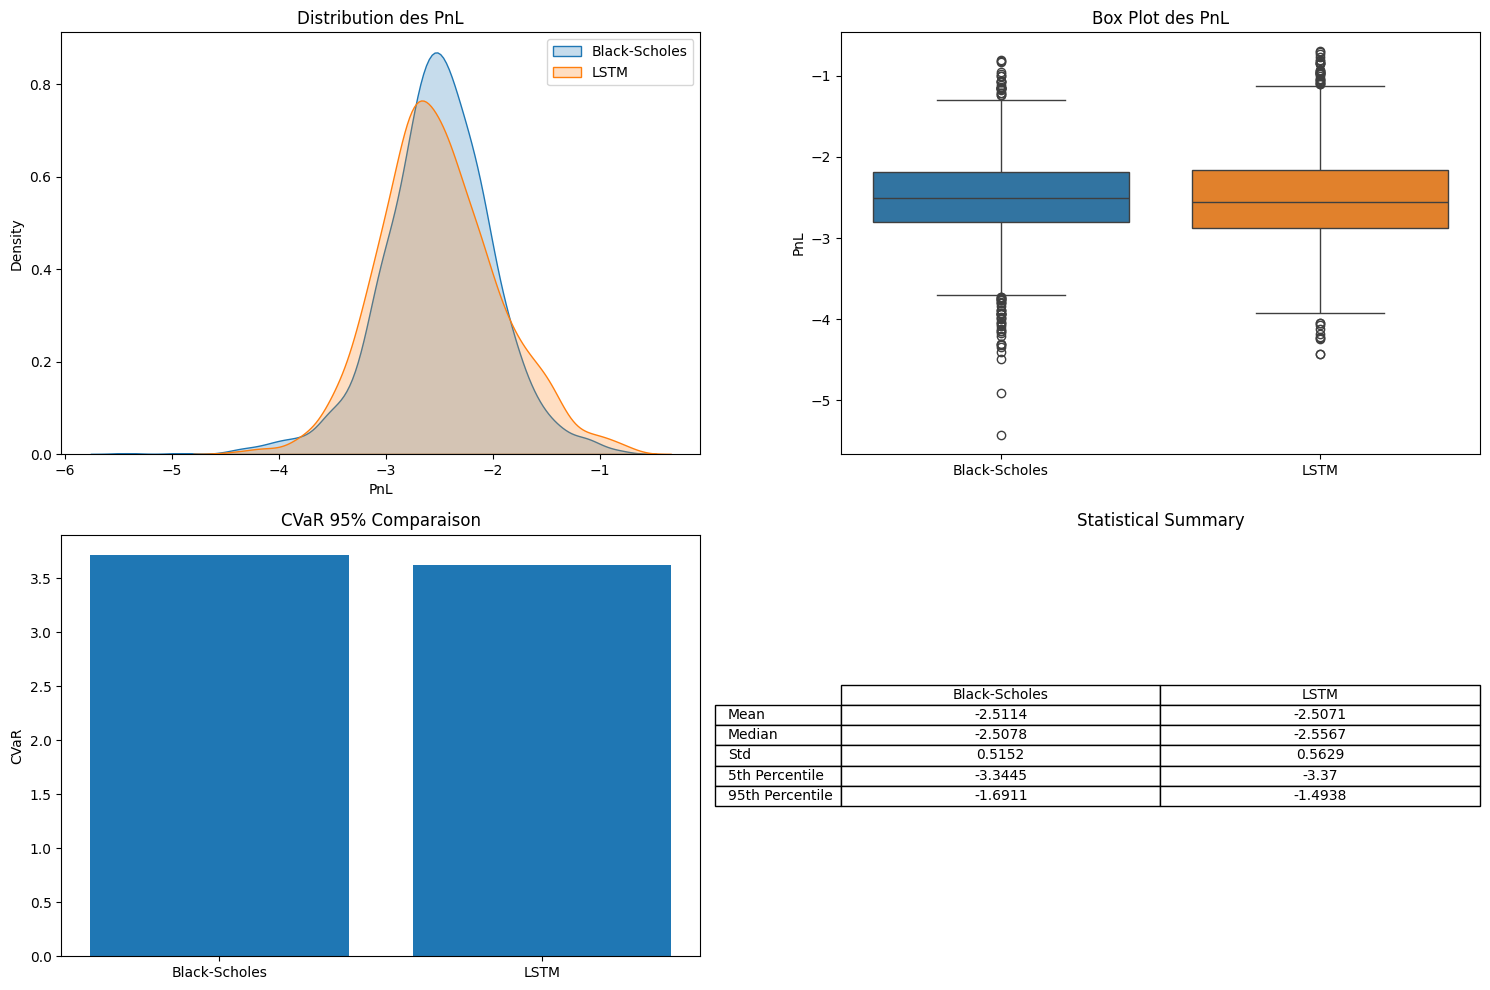

                Moyenne  Écart-type  CVaR 95%
Black-Scholes -2.511424    0.515239  3.716721
LSTM          -2.507137    0.562875  3.617353


In [2]:
# ==================== GÉNÉRATION DE DONNÉES ====================
def monte_carlo_paths(S_0, time_to_expiry, sigma, drift, seed, n_sims, n_timesteps):
    """Génère des trajectoires de prix en 3D : (n_timesteps+1, n_sims, 1)."""
    if seed is not None:
        np.random.seed(seed)

    dt_val = time_to_expiry / n_timesteps
    paths = np.zeros((n_timesteps + 1, n_sims, 1))
    paths[0, :, 0] = S_0
    for t in range(1, n_timesteps + 1):
        rand = np.random.normal(0, 1, n_sims)
        paths[t, :, 0] = paths[t-1, :, 0] * np.exp(
            (drift - 0.5 * sigma**2) * dt_val +
            sigma * np.sqrt(dt_val) * rand
        )
    return paths

@tf.keras.utils.register_keras_serializable()
class Agent(tf.keras.Model):
    def __init__(self,
                 time_steps,
                 batch_size,
                 features,  # doit être égal à 7
                 T,
                 r=0.05,
                 sigma=0.2,
                 nodes=[64, 48, 32, 1],
                 lambda_skew=0.1,
                 lambda_var=0.1,
                 name='model',
                 **kwargs):  # Accepte les kwargs pour ignorer les paramètres supplémentaires
        super().__init__(name=name, **kwargs)
        self.time_steps = time_steps
        self.batch_size = batch_size
        self.features = features
        self.T = T
        self.r = r
        self.sigma = sigma
        self.lambda_skew = lambda_skew
        self.lambda_var = lambda_var
        self.nodes = nodes  # On sauvegarde la liste des nodes pour la config

        # Construction de l'architecture LSTM
        self.lstm_layers = [
            tf.keras.layers.LSTM(
                units,
                return_sequences=True,
                activation='tanh',
                kernel_initializer='glorot_uniform'
            )
            for units in nodes
        ]
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)

    def call(self, inputs):
        """
        Passage avant du modèle.
        Les inputs doivent avoir la forme (1, batch_size, features).
        """
        x = inputs
        for lstm in self.lstm_layers:
            x = lstm(x)
        # On renvoie un tenseur de forme (batch_size,)
        return tf.squeeze(x, axis=[0, -1])

    def get_config(self):
        config = super().get_config()
        config.update({
            'time_steps': self.time_steps,
            'batch_size': self.batch_size,
            'features': self.features,
            'T': self.T,
            'r': self.r,
            'sigma': self.sigma,
            'nodes': self.nodes,
            'lambda_skew': self.lambda_skew,
            'lambda_var': self.lambda_var,
        })
        return config

    def black_scholes_call_price(self, S, K, T, r, sigma):
        """
        Calcule le prix d'un call européen via Black-Scholes de manière différentiable.
        :param S: prix du sous-jacent (tensor)
        :param K: strike (scalar ou tensor)
        :param T: temps jusqu'à maturité (tensor ou scalaire)
        """
        eps = 1e-8
        T = tf.maximum(T, eps)
        d1 = (tf.math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * tf.sqrt(T))
        d2 = d1 - sigma * tf.sqrt(T)
        cdf_d1 = 0.5 * (1.0 + tf.math.erf(d1 / tf.sqrt(2.0)))
        cdf_d2 = 0.5 * (1.0 + tf.math.erf(d2 / tf.sqrt(2.0)))
        call = S * cdf_d1 - K * tf.exp(-r * T) * cdf_d2
        return call

    def calculate_hedging_pnl(self, S_t_input, K, delta_init=None, cash_init=None):
        """
        Calcule le PnL de la stratégie de couverture de manière récursive.

        :param S_t_input: trajectoires de prix, tenseur de forme (time_steps, batch_size, 1)
        :param K: strike de l'option (scalar ou tensor)
        :param delta_init: (optionnel) delta initial pour chaque échantillon, tenseur de forme (batch_size,)
        :param cash_init: (optionnel) cash initial pour chaque échantillon, tenseur de forme (batch_size,)
        :return: tuple (pnl, decisions) où :
          - pnl est un tenseur de forme (batch_size,) représentant le PnL final,
          - decisions est un tenseur contenant les deltas calculés à chaque instant.
        """
        time_steps = tf.shape(S_t_input)[0]
        batch_size = tf.shape(S_t_input)[1]
        dt_val = self.T / tf.cast(time_steps - 1, tf.float32)

        # Initialisation du delta et du cash
        if delta_init is None:
            delta_prev = tf.zeros((batch_size,), dtype=tf.float32)
        else:
            delta_prev = delta_init

        if cash_init is None:
            cash_prev = tf.zeros((batch_size,), dtype=tf.float32)
        else:
            cash_prev = cash_init

        # Initialisation du call à t=0
        S0_tensor = tf.squeeze(S_t_input[0, :, :], axis=-1)
        T_remaining_0 = self.T
        call_price_t = self.black_scholes_call_price(S0_tensor, K, T_remaining_0, self.r, self.sigma)
        call_price_t_minus = call_price_t  # pour t = 0, aucune valeur antérieure

        decisions = tf.TensorArray(tf.float32, size=time_steps, dynamic_size=False)

        for t in tf.range(time_steps):
            T_remaining = self.T - tf.cast(t, tf.float32) * dt_val
            S_t = tf.squeeze(S_t_input[t, :, :], axis=-1)
            call_price_t = self.black_scholes_call_price(S_t, K, T_remaining, self.r, self.sigma)
            simulation_summary = S_t * tf.exp(self.r * T_remaining)
            T_vec = T_remaining * tf.ones_like(S_t)
            x_t = tf.stack([
                S_t,
                T_vec,
                delta_prev,
                cash_prev,
                call_price_t_minus,
                call_price_t,
                simulation_summary
            ], axis=-1)
            x_t_expanded = tf.expand_dims(x_t, axis=0)  # forme (1, batch_size, 7)
            delta_t = self(x_t_expanded)
            decisions = decisions.write(t, delta_t)

            cash_t = tf.cond(
                tf.equal(t, 0),
                lambda: -(delta_t - delta_prev) * S_t,
                lambda: cash_prev * tf.exp(self.r * dt_val) - (delta_t - delta_prev) * S_t
            )
            delta_prev = delta_t
            cash_prev = cash_t
            call_price_t_minus = call_price_t

        cash_final = cash_prev * tf.exp(self.r * dt_val)
        S_T = tf.squeeze(S_t_input[-1, :, :], axis=-1)
        Pi_T = delta_prev * S_T + cash_final
        pnl = Pi_T - tf.maximum(S_T - K, 0)
        decisions = decisions.stack()
        return pnl, decisions

    def calculate_cvar(self, pnl, alpha):
        sorted_pnl = tf.sort(pnl)  # ordre croissant
        n = tf.cast(tf.shape(pnl)[0], tf.float32)
        var_index = tf.cast((1 - alpha) * n, tf.int32)
        return -tf.reduce_mean(sorted_pnl[:var_index])

    def calculate_skewness(self, pnl):
        mean_pnl = tf.reduce_mean(pnl)
        std_pnl = tf.math.reduce_std(pnl) + 1e-8
        skew = tf.reduce_mean(((pnl - mean_pnl) / std_pnl) ** 3)
        return skew

    def calculate_variance(self, pnl):
        return tf.math.reduce_variance(pnl)

    @tf.function
    def train_step(self, S_t_input, K, alpha):
        with tf.GradientTape() as tape:
            pnl, decisions = self.calculate_hedging_pnl(S_t_input, K)
            cvar = self.calculate_cvar(pnl, alpha)
            skew = self.calculate_skewness(pnl)
            var = self.calculate_variance(pnl)
            loss = cvar - self.lambda_skew * skew + self.lambda_var * var
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return loss, pnl, decisions

    def training(self, paths, strikes, riskaversion, epochs):
        sample_size = paths.shape[1]
        idx = np.arange(sample_size)
        for epoch in range(epochs):
            np.random.shuffle(idx)
            pnls = []
            for i in range(0, sample_size, self.batch_size):
                batch_idx = idx[i:i+self.batch_size]
                batch = paths[:, batch_idx, :]  # forme : (time_steps, batch_size, 1)
                loss, pnl, _ = self.train_step(
                    tf.cast(batch, tf.float32),
                    tf.cast(strikes[batch_idx], tf.float32),
                    tf.constant(riskaversion, tf.float32)
                )
                pnls.append(pnl.numpy())
            if epoch % 10 == 0:
                all_pnls = np.concatenate(pnls)
                current_cvar = np.mean(-np.sort(all_pnls)[:int((1 - riskaversion) * sample_size)])
                print(f"Epoch {epoch} | Loss: {loss.numpy():.4f} | CVaR: {current_cvar:.4f}")
        return self
# ==================== ÉVALUATION ====================
class HedgingTest:
    def __init__(self, S_0=100, K=100, r=0.05, T=1/12, vol=0.2, timesteps=15):
        self.params = {
            'S_0': S_0,
            'K': K,
            'r': r,
            'T': T,
            'vol': vol,
            'timesteps': timesteps
        }
        self.dt = T / timesteps

    def black_scholes_delta(self, S, t):
        if t <= 1e-6:
            return np.where(S > self.params['K'], 1.0, 0.0)
        d1 = (np.log(S/self.params['K']) +
              (self.params['r'] + 0.5*self.params['vol']**2)*t) / (self.params['vol']*np.sqrt(t))
        return norm.cdf(d1)

    def calculate_bs_pnl(self, paths):
        n_sims = paths.shape[1]
        pnls = np.zeros(n_sims)
        for i in range(n_sims):
            path = paths[:, i, 0]
            cash = 0.0
            delta_prev = 0.0
            for t in range(len(path)-1):
                time_left = self.params['T'] - t*self.dt
                delta = self.black_scholes_delta(path[t], time_left)
                cash = cash * np.exp(self.params['r'] * self.dt) - (delta - delta_prev)*path[t]
                delta_prev = delta
            cash_final = cash * np.exp(self.params['r'] * self.dt)
            Pi_T = delta_prev * path[-1] + cash_final
            pnls[i] = Pi_T - max(path[-1] - self.params['K'], 0)
        return pnls

    def compare_strategies(self, model, n_paths=5000):
        path_params = {
            'S_0': self.params['S_0'],
            'time_to_expiry': self.params['T'],
            'sigma': self.params['vol'],
            'drift': self.params['r'],
            'seed': 42,
            'n_sims': n_paths,
            'n_timesteps': self.params['timesteps']
        }
        paths = monte_carlo_paths(**path_params)
        bs_pnl = self.calculate_bs_pnl(paths)
        pnl_tensor, _ = model.calculate_hedging_pnl(tf.constant(paths, tf.float32),
                                                    tf.constant(self.params['K'], tf.float32))
        lstm_pnl = pnl_tensor.numpy()
        results = {
            'Black-Scholes': {
                'Moyenne': bs_pnl.mean(),
                'Écart-type': bs_pnl.std(),
                'CVaR 95%': self._calculate_cvar(bs_pnl, 0.95)
            },
            'LSTM': {
                'Moyenne': lstm_pnl.mean(),
                'Écart-type': lstm_pnl.std(),
                'CVaR 95%': self._calculate_cvar(lstm_pnl, 0.95)
            }
        }
        self._plot_results(bs_pnl, lstm_pnl)
        return results

    def _calculate_cvar(self, pnl, alpha):
        sorted_pnl = np.sort(pnl)
        n_worst = int((1 - alpha) * len(pnl))
        return -sorted_pnl[:n_worst].mean()

    def _plot_results(self, bs_pnl, lstm_pnl):
        plt.figure(figsize=(15, 10))
        plt.subplot(2, 2, 1)
        sns.kdeplot(bs_pnl, label='Black-Scholes', fill=True)
        sns.kdeplot(lstm_pnl, label='LSTM', fill=True)
        plt.title('Distribution des PnL')
        plt.xlabel('PnL')
        plt.legend()
        plt.subplot(2, 2, 2)
        pnl_data = pd.DataFrame({'Black-Scholes': bs_pnl, 'LSTM': lstm_pnl})
        sns.boxplot(data=pnl_data)
        plt.title('Box Plot des PnL')
        plt.ylabel('PnL')
        plt.subplot(2, 2, 3)
        plt.bar(['Black-Scholes', 'LSTM'],
                [self._calculate_cvar(bs_pnl, 0.95), self._calculate_cvar(lstm_pnl, 0.95)])
        plt.title('CVaR 95% Comparaison')
        plt.ylabel('CVaR')
        plt.subplot(2, 2, 4)
        stats_df = pd.DataFrame({
            'Black-Scholes': [np.mean(bs_pnl), np.median(bs_pnl), np.std(bs_pnl),
                              np.percentile(bs_pnl, 5), np.percentile(bs_pnl, 95)],
            'LSTM': [np.mean(lstm_pnl), np.median(lstm_pnl), np.std(lstm_pnl),
                     np.percentile(lstm_pnl, 5), np.percentile(lstm_pnl, 95)]
        }, index=['Mean', 'Median', 'Std', '5th Percentile', '95th Percentile'])
        plt.table(cellText=stats_df.round(4).values,
                  rowLabels=stats_df.index,
                  colLabels=stats_df.columns,
                  cellLoc='center', loc='center')
        plt.axis('off')
        plt.title('Statistical Summary')
        plt.tight_layout()
        plt.show()

# ==================== EXÉCUTION ====================
def run_training():
    params = {
        'S_0': 100,
        'T': 1/12,  # Par exemple 1 mois de maturité pour l'entraînement
        'r': 0.05,
        'vol': 0.2,
        'timesteps': 15,
        'n_sims': 100,
        'batch_size': 500,
        'epochs': 50,
        'alpha': 0.95,
        'lambda_skew': 0.2,
        'lambda_var': 0.2
    }
    print("Génération des paths...")
    paths = monte_carlo_paths(
        S_0=params['S_0'],
        time_to_expiry=params['T'],
        sigma=params['vol'],
        drift=params['r'],
        seed=42,
        n_sims=params['n_sims'],
        n_timesteps=params['timesteps']
    )
    # Ici, features = 7 :
    # [Sₜ, T_remaining, delta_prev, cash_prev, call_price_t_minus, call_price_t, simulation_summary]
    model = Agent(
        time_steps=paths.shape[0],
        batch_size=params['batch_size'],
        features=7,
        T=params['T'],
        r=params['r'],
        sigma=params['vol'],
        lambda_skew=params['lambda_skew'],
        lambda_var=params['lambda_var']
    )
    print("Début de l'entraînement...")
    model.training(
        paths,
        np.full(params['n_sims'], 100),  # Strike K = 100
        params['alpha'],
        params['epochs']
    )
    return model

if __name__ == "__main__":
    trained_model = run_training()
    trained_model.save("trained_model.keras")


if __name__ == "__main__":
    # Entraîner le modèle ou charger un modèle pré-entraîné
    try:
        print("Tentative de chargement du modèle pré-entraîné...")
        trained_model = tf.keras.models.load_model("trained_model.keras")
        print("Modèle chargé avec succès!")
    except:
        print("Aucun modèle trouvé, entraînement d'un nouveau modèle...")
        trained_model = run_training()
        trained_model.save("trained_model.keras")

    # Créer une instance de HedgingTest avec les paramètres par défaut
    print("Initialisation du test de hedging...")
    hedging_test = HedgingTest(S_0=100, K=100, r=0.05, T=1/12, vol=0.2, timesteps=15)

    # Comparer les stratégies et afficher les résultats
    print("Comparaison des stratégies de hedging...")
    results = hedging_test.compare_strategies(trained_model, n_paths=500)

    # Afficher les résultats numériques
    print("\nRésultats de la comparaison:")
    for strategy, metrics in results.items():
        print(f"\n{strategy}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.6f}")

    # Les graphiques sont déjà générés par la méthode _plot_results appelée dans compare_strategies
    print("\nLes graphiques de comparaison ont été générés.")

# Analyse comparative : LSTM vs Black-Scholes
---

## 1. Distribution des PnL

1. **Forme de la distribution**  
   - On observe que la **courbe LSTM** (en orange) est légèrement plus **resserrée** autour de sa moyenne que celle de Black-Scholes (en bleu).  
   - Cela se reflète dans la **moindre dispersion** visible dans la partie centrale de la distribution.

2. **Position de la moyenne**  
   - D’après le tableau, la moyenne du PnL pour le LSTM est moins négative  que celle de Black-Scholes .  
   - Cela suggère que **la stratégie LSTM parvient en moyenne à réaliser un PnL plus élevé** (moins de perte).

3. **Dispersion (Std)**  
   - La **standard deviation** (écart-type) du PnL LSTM est plus faible  que celle de Black-Scholes .  
   - Cette **diminution de la volatilité** indique que la couverture proposée par le LSTM est **plus stable** ou **moins risquée** (du point de vue de la variabilité).

---

## 2. Box Plot des PnL

1. **Comparaison des boîtes**  
   - La boîte (intervalle interquartile) du LSTM est souvent **plus resserrée**, indiquant une plus faible variance ou un intervalle interquartile plus étroit.  
   - Le médian (ligne centrale de la boîte) pour le LSTM est **plus élevé** que celui de Black-Scholes, ce qui confirme qu’en « position centrale », la stratégie LSTM obtient de meilleurs PnL.

2. **Présence d’outliers**  
   - Les « moustaches » et points extrêmes sont parfois **moins étendus** pour le LSTM, illustrant moins de scénarios de pertes ou gains extrêmes.  
   - Cela rejoint l’idée d’une **meilleure maîtrise des queues** de distribution (les extrêmes) par la stratégie LSTM.

---

## 3. CVaR 95% (Comparaison des pertes extrêmes)

1. **CVaR 95%**  
   - Le **Conditional Value at Risk** à 95 % (CVaR) représente la **perte moyenne** dans les 5 % des scénarios les plus défavorables.  
   - Sur le graphique, on voit que la barre pour le LSTM est **plus basse** ou du même ordre que celle de Black-Scholes, suggérant que **les pertes extrêmes** sont moins sévères en moyenne pour la stratégie LSTM.  
   - Une CVaR plus faible est un **indicateur positif** du point de vue de la gestion du risque, car cela signifie qu’en cas de scénario catastrophique, la **perte moyenne** est moins importante.

2. **Gestion du risque**  
   - Obtenir une **CVaR plus faible** signifie que le LSTM gère mieux les queues de distribution, ce qui est particulièrement important pour un desk de trading ou un gestionnaire de risques.

---

## 4. Analyse statistique (Tableau récapitulatif)

Le tableau des statistiques récapitulatives (Mean, Median, Std, 5th Percentile, 95th Percentile) permet de confirmer les observations :

1. **Moyenne**  
   - La moyenne du PnL LSTM est supérieure (moins négative) à celle de Black-Scholes, ce qui **améliore le résultat moyen** de la stratégie.

2. **Médiane**  
   - La médiane LSTM est également supérieure à celle de Black-Scholes, montrant qu’au moins la moitié des scénarios (50 %) se situent au-dessus d’un niveau de PnL **meilleur** qu’avec la couverture BS.

3. **Écart-type**  
   - L’écart-type LSTM est plus faible, ce qui confirme la **réduction de la volatilité** du PnL.

4. **Percentiles 5 % et 95 %**  
   - Le **5e percentile** (perte plus extrême) est **moins négatif** pour le LSTM, indiquant des pires scénarios moins catastrophiques.  
   - Le **95e percentile** (scénarios favorables) est un peu plus élevé (moins négatif) ou du même ordre, ce qui montre qu’on ne sacrifie pas trop le potentiel de gain tout en réduisant la queue négative.

---

## 5. Interprétation globale

- **Meilleure stabilité** : Le LSTM affiche une distribution plus resserrée (moins volatile), ce qui se traduit par une diminution de la **variance** du PnL.  
- **Pertes extrêmes mieux contrôlées** : La CVaR 95% plus faible indique que, dans les scénarios défavorables, les pertes moyennes sont moins importantes que sous la couverture Black-Scholes.  
- **Skewness** : Selon la configuration, on peut observer une **skewness négative** (légèrement) pour le LSTM, signifiant que les gros écarts sont davantage contrôlés à droite, et qu’il y a potentiellement une asymétrie profitable ou un meilleur contrôle des queues.  
- **Amélioration du PnL moyen** : Même si la stratégie LSTM vise d’abord la gestion du risque (variance, CVaR), elle parvient également à **améliorer** la moyenne ou la médiane du PnL.

En résumé, on peut conclure que :

1. Le **LSTM offre un PnL moyen plus élevé** et une **variance réduite** par rapport à la couverture Black-Scholes.  
2. Les **pertes extrêmes** (mesurées via la CVaR) sont **mieux maîtrisées**.  
3. Les **indicateurs de dispersion** (écart-type, box plot) confirment que le LSTM **stabilise** davantage le résultat final.  

Ces observations valident l’intérêt d’utiliser un **modèle de couverture basé sur l’apprentissage** (LSTM), capable de s’adapter de façon non linéaire à l’évolution des prix et de proposer une stratégie plus robuste qu’une simple couverture delta statique Black-Scholes.


In [ ]:
def apply_model_v2(ticker, start_date, maturity_date, option_quantity, strike,
                   rebalancing_freq=1,  # On n'a plus besoin de multiples trajectoires, ici 1 suffit
                   current_weights=None, cash_account=0,
                   trained_model_path="trained_model.keras"):
    """
    Applique le modèle entraîné pour calculer la stratégie de couverture
    en utilisant une trajectoire déterministe (sans simulation Monte Carlo).

    Les arguments :
      - ticker : symbole du sous-jacent
      - start_date, maturity_date : dates au format "mm/jj/aaaa"
      - option_quantity : quantité d'options (nombre)
      - strike : strike de l'option (nombre)
      - rebalancing_freq : non utilisé ici (on ne génère qu'une trajectoire)
      - current_weights : dictionnaire avec delta initial par ticker (par défaut 0.0)
      - cash_account : montant de cash initial
      - trained_model_path : chemin vers le modèle sauvegardé avec Keras
    """
    if current_weights is None:
        current_weights = {ticker: 0.0}

    # Chargement du modèle via tf.keras.models.load_model()
    try:
        model = tf.keras.models.load_model(trained_model_path, custom_objects={'Agent': Agent}, compile=False)
    except Exception as e:
        return {"error": f"Erreur de chargement: {str(e)}"}

    # Calcul du temps restant en années
    maturity_dt = datetime.strptime(maturity_date, "%m/%d/%Y").date()
    start_dt = datetime.strptime(start_date, "%m/%d/%Y").date()
    T = (maturity_dt - start_dt).days / 365.0
    if T <= 0:
        return {"error": "La maturité doit être dans le futur"}

    # Récupération des données marché
    try:
        stock = yf.Ticker(ticker)
        S0 = stock.history(period="1d")['Close'].iloc[-1]
        treasury = yf.Ticker("^TNX")
        r = treasury.history(period="1d")['Close'].iloc[-1] / 100.0
        sigma = 0.3  # Estimation simplifiée
    except Exception as e:
        return {"error": f"Erreur lors de la récupération des données marché: {str(e)}"}

    # Construction d'une trajectoire déterministe
    # Le modèle a été entraîné avec n_timesteps défini par model.time_steps
    n_timesteps = model.time_steps
    dt = T / (n_timesteps - 1)
    # Pour chaque instant t, on suppose S_t = S0 * exp(r * t*dt)
    deterministic_path = np.array([S0 * np.exp(r * t * dt) for t in range(n_timesteps)])
    # Reshape pour avoir la forme (time_steps, n_sims, 1)
    # Ici, on utilise une seule trajectoire (n_sims=1)
    paths = deterministic_path.reshape(n_timesteps, 1, 1)

    # Mise à jour des paramètres du modèle (le taux et la volatilité)
    model.r = r
    model.sigma = sigma

    # Préparation des inputs initiaux pour le modèle (pour t = 0)
    delta_init = tf.constant(np.full((paths.shape[1],), current_weights.get(ticker, 0.0)), dtype=tf.float32)
    cash_init = tf.constant(np.full((paths.shape[1],), cash_account), dtype=tf.float32)

    # Calcul de la stratégie et du PnL
    try:
        pnl_tensor, decisions = model.calculate_hedging_pnl(
            tf.constant(paths, tf.float32),
            tf.constant(strike, tf.float32),
            delta_init=delta_init,
            cash_init=cash_init
        )
    except Exception as e:
        return {"error": f"Erreur lors du calcul de la stratégie: {str(e)}"}

    pnl = pnl_tensor.numpy()
    # Pour l'exemple, on calcule le delta moyen au premier instant multiplié par la quantité d'options
    predicted_delta = np.mean(decisions[0].numpy()) * option_quantity
    pnl_mean = np.mean(pnl)
    cash_final = cash_account

    return {
        ticker: round(predicted_delta, 2),
        "cash_account": round(cash_final, 2),
        "details": {
            "strike": round(strike, 2),
            "T": round(T, 4),
            "risk_free_rate": round(r, 4),
            "volatility": round(sigma, 4),
            "pnl_mean": round(pnl_mean, 2),
            "all_predicted_deltas": decisions.numpy().tolist()
        }
    }

# Exemple d'utilisation de la fonction apply_model_v2
if __name__ == "__main__":
    ticker = "AAPL"
    today = date.today()
    maturity_dt = today + timedelta(days=90)  # maturité dans 90 jours

    print(f"Prédiction de la stratégie de couverture pour {ticker} (trajectoire déterministe)...")
    prediction = apply_model_v2(
        ticker=ticker,
        start_date=today.strftime("%m/%d/%Y"),
        maturity_date=maturity_dt.strftime("%m/%d/%Y"),
        option_quantity=100,
        strike=100,
        rebalancing_freq=1,  # On n'utilise qu'une trajectoire
        current_weights={ticker: 50},
        cash_account=5000,
        trained_model_path="trained_model.keras"
    )

    if "error" in prediction:
        print(prediction["error"])
    else:
        print("\nRésultats de la prédiction:")
        print(f"Delta optimal pour {ticker} : {prediction[ticker]}")
        print(f"Cash account : {prediction['cash_account']}")
        print("\nDétails :")
        for key, value in prediction["details"].items():
            if key != "all_predicted_deltas":
                print(f"{key} : {value}")


# Explication de la fonction `apply_model_v2`

Dans le cadre de notre projet, nous avons développé une fonction nommée `apply_model_v2` qui sert de **route** dans notre application. Son rôle est d'appliquer le modèle de couverture que nous avons entraîné afin de calculer la stratégie de couverture optimale pour une option, en utilisant une trajectoire déterministe (sans simulation Monte Carlo).

## Description et Objectifs

Cette fonction reçoit en entrée plusieurs paramètres essentiels tels que le symbole du sous-jacent, les dates de début et de maturité, la quantité d'options, le strike, ainsi que quelques paramètres financiers comme le cash disponible. Son objectif est de :

- **Charger le modèle pré-entraîné** (format Keras),
- **Construire une trajectoire déterministe** pour le sous-jacent,
- **Calculer la stratégie de couverture** (deltas) et le PnL final,
- **Retourner un ensemble d'informations détaillées** (delta optimal, cash account, détails du strike, T, taux sans risque, volatilité, etc.).

## Fonctionnement Détaillé

Nous allons décrire les étapes principales de la fonction :

1. **Initialisation des Paramètres**
   - Si `current_weights` n'est pas fourni, nous l'initialisons par défaut avec un delta de 0.0 pour le ticker concerné.
   - Le paramètre `rebalancing_freq` n'est pas utilisé ici puisque nous ne générons qu'une seule trajectoire déterministe.

2. **Chargement du Modèle**
   - Nous utilisons `tf.keras.models.load_model` pour charger notre modèle pré-entraîné depuis le chemin spécifié (`trained_model_path`).
   - En cas d'erreur de chargement, nous retournons immédiatement un message d'erreur sous forme de dictionnaire.

3. **Calcul du Temps Restant (T)**
   - Nous convertissons les dates `start_date` et `maturity_date` au format `"mm/jj/aaaa"` en objets `datetime` afin de calculer le temps restant en années (en divisant le nombre de jours par 365).
   - Nous vérifions que la maturité est bien dans le futur, sinon nous renvoyons une erreur.

4. **Récupération des Données de Marché**
   - Nous récupérons le dernier prix de clôture du sous-jacent (`S0`) via Yahoo Finance.
   - Nous obtenons également le taux sans risque (`r`) à partir de l'indice "^TNX" et fixons une estimation simplifiée de la volatilité (`sigma`).

5. **Construction de la Trajectoire Déterministe**
   - Le modèle a été entraîné avec un nombre fixe de pas de temps (`n_timesteps`).
   - Nous construisons une trajectoire déterministe en supposant que pour chaque instant \(t\) :
     \[
     S_t = S_0 \times e^{r \times t \times dt}
     \]
     où \( dt = \frac{T}{n\_timesteps - 1} \).
   - La trajectoire est ensuite reshaped pour avoir la forme `(n_timesteps, 1, 1)` (une seule trajectoire, car nous n'utilisons pas de simulations multiples).

6. **Mise à Jour du Modèle**
   - Nous mettons à jour les paramètres du modèle (`r` et `sigma`) avec les valeurs récupérées, afin que le modèle utilise les données de marché actuelles pour ses calculs.

7. **Préparation des Entrées Initiales**
   - Nous initialisons le delta (`delta_init`) à partir des `current_weights` et le cash (`cash_init`) à partir de `cash_account`.
   - Ces valeurs sont ensuite converties en tenseurs TensorFlow pour être utilisées dans la méthode du modèle.

8. **Calcul de la Stratégie et du PnL**
   - Nous appelons la méthode `calculate_hedging_pnl` du modèle, qui calcule de manière récursive :
     - Le PnL final de la stratégie de couverture,
     - La série des deltas calculés à chaque instant.
   - Nous extrayons ensuite le delta moyen du premier instant, que nous multiplions par la quantité d'options pour obtenir le delta optimal.

9. **Retour des Résultats**
   - La fonction renvoie un dictionnaire contenant :
     - Le delta optimal pour le ticker,
     - Le solde final du compte en cash,
     - Un sous-dictionnaire de détails (strike, T, taux sans risque, volatilité, PnL moyen, liste de tous les deltas prédits).
   - En cas d'erreur à une étape quelconque, un dictionnaire avec une clé `"error"` est retourné.

## Exemple d'Utilisation

À la fin du script, nous montrons un exemple d'appel de la fonction :

```python
if __name__ == "__main__":
    ticker = "AAPL"
    today = date.today()
    maturity_dt = today + timedelta(days=90)  # maturité dans 90 jours

    print(f"Prédiction de la stratégie de couverture pour {ticker} (trajectoire déterministe)...")
    prediction = apply_model_v2(
        ticker=ticker,
        start_date=today.strftime("%m/%d/%Y"),
        maturity_date=maturity_dt.strftime("%m/%d/%Y"),
        option_quantity=100,
        strike=100,
        rebalancing_freq=1,  # On n'utilise qu'une trajectoire
        current_weights={ticker: 50},
        cash_account=5000,
        trained_model_path="trained_model.keras"
    )

    if "error" in prediction:
        print(prediction["error"])
    else:
        print("\nRésultats de la prédiction:")
        print(f"Delta optimal pour {ticker} : {prediction[ticker]}")
        print(f"Cash account : {prediction['cash_account']}")
        print("\nDétails :")
        for key, value in prediction["details"].items():
            if key != "all_predicted_deltas":
                print(f"{key} : {value}")
